# Clustering from stress levels and stress management strategies

Sum question each part, PCA with part of question and information, clustering group K=3, then analysis each group

## Import Librara and Data

In [1]:
import numpy as np 
import pandas as pd
import sys
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px
import pickle
import matplotlib
import matplotlib.font_manager as fm
from os import path
import seaborn as sns

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("/Users/phattharakit_/Desktop/application/แบบสอบถามประเมินความเครียดและวิธีการจัดการความเครียดของนักศึกษา.csv")

In [3]:
df.head()

,ประทับเวลา,คณะที่เรียน,สาขาที่เรียน (หากสะดวกให้ข้อมูล),เพศ,ชั้นปีการศึกษา,ยินยอมในการใช้และเก็บรักษา ข้อมูลส่วนบุคคลของท่าน,ส่วนที่ 1 : ทางกายภาพ [ปวดหัว],ส่วนที่ 1 : ทางกายภาพ [มีปัญหาในการนอน],ส่วนที่ 1 : ทางกายภาพ [วิตกกังวลมากกว่าปกติ],ส่วนที่ 1 : ทางกายภาพ [ปวดท้องหรือคลื่นไส้],...,จากการเรียนที่ผ่านมาทั้งหมด ปัจจัยทางความเครียดใดที่ส่งผลต่อคุณมากที่สุดในแต่ละภาคเรียน (หากเรียน 4 ปี ไม่ต้องเลือกปี 5 และ 6) [ปี 3 เทอม 2],จากการเรียนที่ผ่านมาทั้งหมด ปัจจัยทางความเครียดใดที่ส่งผลต่อคุณมากที่สุดในแต่ละภาคเรียน (หากเรียน 4 ปี ไม่ต้องเลือกปี 5 และ 6) [ปี 4 เทอม 1],จากการเรียนที่ผ่านมาทั้งหมด ปัจจัยทางความเครียดใดที่ส่งผลต่อคุณมากที่สุดในแต่ละภาคเรียน (หากเรียน 4 ปี ไม่ต้องเลือกปี 5 และ 6) [ปี 4 เทอม 2],จากการเรียนที่ผ่านมาทั้งหมด ปัจจัยทางความเครียดใดที่ส่งผลต่อคุณมากที่สุดในแต่ละภาคเรียน (หากเรียน 4 ปี ไม่ต้องเลือกปี 5 และ 6) [ปี 5 เทอม 1],จากการเรียนที่ผ่านมาทั้งหมด ปัจจัยทางความเครียดใดที่ส่งผลต่อคุณมากที่สุดในแต่ละภาคเรียน (หากเรียน 4 ปี ไม่ต้องเลือกปี 5 และ 6) [ปี 5 เทอม 2],จากการเรียนที่ผ่านมาทั้งหมด ปัจจัยทางความเครียดใดที่ส่งผลต่อคุณมากที่สุดในแต่ละภาคเรียน (หากเรียน 4 ปี ไม่ต้องเลือกปี 5 และ 6) [ปี 6 เทอม 1],จากการเรียนที่ผ่านมาทั้งหมด ปัจจัยทางความเครียดใดที่ส่งผลต่อคุณมากที่สุดในแต่ละภาคเรียน (หากเรียน 4 ปี ไม่ต้องเลือกปี 5 และ 6) [ปี 6 เทอม 2],รายละเอียด ปัญหา ของความเครียดหรือวิธีการจัดการความเครียด (หากไม่ประสงค์ตอบสามารถข้ามคำถามได้),บอกเราหน่อยได้ไหมว่าจากการเรียนที่ผ่าน คิดว่าคณะนี้เหมาะสมกับตัวเองหรือไม่,ระบายความเครียดมาเลยเราจะรับฟังไว้เอง❤️
0,"25/10/2023, 15:24:51",นิติศาสตร์,-,ชาย,ปี 1,ยินยอม,นาน ๆ ครั้ง,ไม่เคย,นาน ๆ ครั้ง,ไม่เคย,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,เหมาะสม,-
1,"20/11/2023, 15:43:00",นิติศาสตร์,-,ชาย,ปี 4,ยินยอม,นาน ๆ ครั้ง,บ่อย,นาน ๆ ครั้ง,ไม่เคย,...,ทางการศึกษา,ทางกายภาพ,NaN,NaN,NaN,NaN,NaN,ปกติแล้วมีปัญหาแค่เรื่องการเงินกับความยากทางกา...,เหมาะสม,NaN
2,"25/10/2023, 13:39:50",พยาบาลศาสตร์,-,หญิง,ปี 2,ยินยอม,นาน ๆ ครั้ง,บ่อย,บ่อย,นาน ๆ ครั้ง,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เหมาะสม,NaN
3,"27/10/2023, 19:48:59",พยาบาลศาสตร์,-,หญิง,ปี 3,ยินยอม,ไม่เคย,นาน ๆ ครั้ง,ไม่เคย,ไม่เคย,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เหมาะสม,NaN
4,"27/10/2023, 19:52:56",พยาบาลศาสตร์,-,หญิง,ปี 3,ยินยอม,ไม่เคย,นาน ๆ ครั้ง,บ่อย,นาน ๆ ครั้ง,...,ทางการศึกษา,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ไม่เหมาะสม,NaN


In [4]:
df.columns

Index(['ประทับเวลา', 'คณะที่เรียน', 'สาขาที่เรียน (หากสะดวกให้ข้อมูล)',
       '  เพศ', 'ชั้นปีการศึกษา',
       'ยินยอมในการใช้และเก็บรักษา ข้อมูลส่วนบุคคลของท่าน',
       'ส่วนที่ 1 : ทางกายภาพ [ปวดหัว]',
       'ส่วนที่ 1 : ทางกายภาพ [มีปัญหาในการนอน]',
       'ส่วนที่ 1 : ทางกายภาพ [วิตกกังวลมากกว่าปกติ]',
       'ส่วนที่ 1 : ทางกายภาพ [ปวดท้องหรือคลื่นไส้]',
       'ส่วนที่ 1 : ทางกายภาพ [เหนื่อยล้าหรืออ่อนเพลียเป็นประจำ]',
       'ส่วนที่ 2 : ทางความสัมพันธ์ระหว่างบุคคล [รู้สึกผิดเมื่อไม่สามารถทำตามความหวังของพ่อแม่ให้เป็นจริงได้]',
       'ส่วนที่ 2 : ทางความสัมพันธ์ระหว่างบุคคล [รู้สึกว่าการเข้ากับเพื่อนในห้องเรียนเป็นเรื่องที่ยาก]',
       'ส่วนที่ 2 : ทางความสัมพันธ์ระหว่างบุคคล [รู้สึกว่าเสียสมาธิเมื่อทะเลาะกับคนรัก]',
       'ส่วนที่ 2 : ทางความสัมพันธ์ระหว่างบุคคล [ไม่ได้รับการสนับสนุนจากคุณครูหรืออาจารย์]',
       'ส่วนที่ 2 : ทางความสัมพันธ์ระหว่างบุคคล [รู้สึกท้อต่อการจัดการ การบริหารงานของคณะที่เรียนอยู่]',
       'ส่วนที่ 3 : ทางการศึกษา [การใช้จ่ายในมหาวิทยาลัยทำให้ม

In [5]:
selected_columns = ['คณะที่เรียน', '  เพศ', 'ชั้นปีการศึกษา','ส่วนที่ 1 : ทางกายภาพ [ปวดหัว]',
       'ส่วนที่ 1 : ทางกายภาพ [มีปัญหาในการนอน]',
       'ส่วนที่ 1 : ทางกายภาพ [วิตกกังวลมากกว่าปกติ]',
       'ส่วนที่ 1 : ทางกายภาพ [ปวดท้องหรือคลื่นไส้]',
       'ส่วนที่ 1 : ทางกายภาพ [เหนื่อยล้าหรืออ่อนเพลียเป็นประจำ]',
       'ส่วนที่ 2 : ทางความสัมพันธ์ระหว่างบุคคล [รู้สึกผิดเมื่อไม่สามารถทำตามความหวังของพ่อแม่ให้เป็นจริงได้]',
       'ส่วนที่ 2 : ทางความสัมพันธ์ระหว่างบุคคล [รู้สึกว่าการเข้ากับเพื่อนในห้องเรียนเป็นเรื่องที่ยาก]',
       'ส่วนที่ 2 : ทางความสัมพันธ์ระหว่างบุคคล [รู้สึกว่าเสียสมาธิเมื่อทะเลาะกับคนรัก]',
       'ส่วนที่ 2 : ทางความสัมพันธ์ระหว่างบุคคล [ไม่ได้รับการสนับสนุนจากคุณครูหรืออาจารย์]',
       'ส่วนที่ 2 : ทางความสัมพันธ์ระหว่างบุคคล [รู้สึกท้อต่อการจัดการ การบริหารงานของคณะที่เรียนอยู่]',
       'ส่วนที่ 3 : ทางการศึกษา [การใช้จ่ายในมหาวิทยาลัยทำให้มีปัญหาการเงิน]',
       'ส่วนที่ 3 : ทางการศึกษา [รู้สึกกังวลในการนำเสนอในชั้นเรียน]',
       'ส่วนที่ 3 : ทางการศึกษา [รู้สึกเครียดเมื่อต้องนั่งทำข้อสอบ]',
       'ส่วนที่ 3 : ทางการศึกษา [สนใจในเนื้อหาที่เรียนลดลง]',
       'ส่วนที่ 3 : ทางการศึกษา [รู้สึกเครียดในการรับมือกับวิชาที่ยากหรือไม่ถนัด]',
       'ส่วนที่ 4 : ทางสภาพเเวดล้อม [รู้สึกตึงเครียดเนื่องจากสภาพที่อยู่อาศัยที่แย่]',
       'ส่วนที่ 4 : ทางสภาพเเวดล้อม [เสียงรอบข้างทำให้ไม่มีสมาธิ]',
       'ส่วนที่ 4 : ทางสภาพเเวดล้อม [สภาพความเป็นอยู่ที่ไม่เป็นระเบียบทำให้ไม่มีสมาธิ]',
       'ส่วนที่ 4 : ทางสภาพเเวดล้อม [ความเบียดเสียดวุ่นวายทำให้รู้สึกไม่สบาย]',
       'ส่วนที่ 4 : ทางสภาพเเวดล้อม [รู้สึกกลัวกับการอยู่ในที่ที่ไม่คุ้นเคย]',
       'ส่วนที่ 1 [ไตร่ตรองเกี่ยวกับทางเลือกต่างๆอย่างถี่ถ้วน]',
       'ส่วนที่ 1 [ลองแก้ไขปัญหาด้วยวิธีที่หลากหลาย จนกว่าจะเจอวิธีที่ตอบโจทย์มากที่สุด]',
       'ส่วนที่ 1 [ใช้สมาธิหรือความสนใจทั้งหมดมุ่งไปที่การแก้ไขปัญหา]',
       'ส่วนที่ 1 [พยายามแก้ไขปัญหา]',
       'ส่วนที่ 1 [วางแผนการกระทำอย่างรอบคอบแทนที่จะทำตามแรงกดดันของสถานการณ์]',
       'ส่วนที่ 2 [บอกเล่าความรู้สึกให้เพื่อนรู้]',
       'ส่วนที่ 2 [ยอมรับความเข้าใจและความเห็นอกเห็นใจจากคนอื่น]',
       'ส่วนที่ 2 [ไว้ใจเพื่อนหรือญาติในการพูดคุยเกี่ยวกับความกังวลหรือความกลัว]',
       'ส่วนที่ 2 [พูดคุยปัญหาที่เกิดขึ้นกับคนอื่น ๆ เพื่อที่นำมาสู่แนวทางการแก้ไขปัญหานั้น]',
       'ส่วนที่ 2 [พบใครบางคน (เพื่อนหรือผู้เชี่ยวชาญ) เพื่อช่วยให้รู้สึกดีขึ้น]',
       'ส่วนที่ 3 [นำตัวเองหนีห่างออกจากปัญหา]',
       'ส่วนที่ 3 [ใช้เวลาคนเดียวอยู่บ่อยๆ]',
       'ส่วนที่ 3 [หลีกเลี่ยงการอยู่กับผู้คนในชีวิตประจำวัน]',
       'ส่วนที่ 3 [ปล่อยให้ตัวเองหมกมุ่นอยู่กับกีฬาหรืองานอดิเรกเพื่อที่จะหลีกเลี่ยงปัญหาที่เกิดขึ้น]',
       'ส่วนที่ 3 [นอนมากกว่าปกติ]']
       # 'ระบายความเครียดมาเลยเราจะรับฟังไว้เอง❤️']

# สร้าง DataFrame ใหม่ที่มีเฉพาะคอลัมน์ที่เลือก
df = df[selected_columns]

In [6]:
df.head()

,คณะที่เรียน,เพศ,ชั้นปีการศึกษา,ส่วนที่ 1 : ทางกายภาพ [ปวดหัว],ส่วนที่ 1 : ทางกายภาพ [มีปัญหาในการนอน],ส่วนที่ 1 : ทางกายภาพ [วิตกกังวลมากกว่าปกติ],ส่วนที่ 1 : ทางกายภาพ [ปวดท้องหรือคลื่นไส้],ส่วนที่ 1 : ทางกายภาพ [เหนื่อยล้าหรืออ่อนเพลียเป็นประจำ],ส่วนที่ 2 : ทางความสัมพันธ์ระหว่างบุคคล [รู้สึกผิดเมื่อไม่สามารถทำตามความหวังของพ่อแม่ให้เป็นจริงได้],ส่วนที่ 2 : ทางความสัมพันธ์ระหว่างบุคคล [รู้สึกว่าการเข้ากับเพื่อนในห้องเรียนเป็นเรื่องที่ยาก],...,ส่วนที่ 2 [บอกเล่าความรู้สึกให้เพื่อนรู้],ส่วนที่ 2 [ยอมรับความเข้าใจและความเห็นอกเห็นใจจากคนอื่น],ส่วนที่ 2 [ไว้ใจเพื่อนหรือญาติในการพูดคุยเกี่ยวกับความกังวลหรือความกลัว],ส่วนที่ 2 [พูดคุยปัญหาที่เกิดขึ้นกับคนอื่น ๆ เพื่อที่นำมาสู่แนวทางการแก้ไขปัญหานั้น],ส่วนที่ 2 [พบใครบางคน (เพื่อนหรือผู้เชี่ยวชาญ) เพื่อช่วยให้รู้สึกดีขึ้น],ส่วนที่ 3 [นำตัวเองหนีห่างออกจากปัญหา],ส่วนที่ 3 [ใช้เวลาคนเดียวอยู่บ่อยๆ],ส่วนที่ 3 [หลีกเลี่ยงการอยู่กับผู้คนในชีวิตประจำวัน],ส่วนที่ 3 [ปล่อยให้ตัวเองหมกมุ่นอยู่กับกีฬาหรืองานอดิเรกเพื่อที่จะหลีกเลี่ยงปัญหาที่เกิดขึ้น],ส่วนที่ 3 [นอนมากกว่าปกติ]
0,นิติศาสตร์,ชาย,ปี 1,นาน ๆ ครั้ง,ไม่เคย,นาน ๆ ครั้ง,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,...,มีบ้างเล็กน้อย,บ่อยครั้ง,บ่อยครั้ง,บ่อยครั้ง,มีบ้างเล็กน้อย,มีบ้างเล็กน้อย,บ่อยครั้ง,ไม่เลย,บ่อยครั้ง,มีบ้างเล็กน้อย
1,นิติศาสตร์,ชาย,ปี 4,นาน ๆ ครั้ง,บ่อย,นาน ๆ ครั้ง,ไม่เคย,บ่อย,ไม่เคย,นาน ๆ ครั้ง,...,มีบ้างเล็กน้อย,มีบ้างเล็กน้อย,มีบ้างเล็กน้อย,มีบ้างเล็กน้อย,ไม่เลย,มีบ้างเล็กน้อย,บ่อยครั้ง,มีบ้างเล็กน้อย,มีบ้างเล็กน้อย,มีบ้างเล็กน้อย
2,พยาบาลศาสตร์,หญิง,ปี 2,นาน ๆ ครั้ง,บ่อย,บ่อย,นาน ๆ ครั้ง,บ่อย,บ่อย,นาน ๆ ครั้ง,...,บ่อยครั้ง,บ่อยครั้ง,มีบ้างเล็กน้อย,บ่อยครั้ง,บ่อยครั้ง,มีบ้างเล็กน้อย,บ่อยครั้ง,มีบ้างเล็กน้อย,มีบ้างเล็กน้อย,บ่อยครั้ง
3,พยาบาลศาสตร์,หญิง,ปี 3,ไม่เคย,นาน ๆ ครั้ง,ไม่เคย,ไม่เคย,นาน ๆ ครั้ง,ไม่เคย,ไม่เคย,...,บ่อยครั้ง,บ่อยครั้ง,บ่อยครั้ง,บ่อยครั้ง,บ่อยครั้ง,ไม่เลย,มีบ้างเล็กน้อย,ไม่เลย,มีบ้างเล็กน้อย,มีบ้างเล็กน้อย
4,พยาบาลศาสตร์,หญิง,ปี 3,ไม่เคย,นาน ๆ ครั้ง,บ่อย,นาน ๆ ครั้ง,บ่อย,นาน ๆ ครั้ง,นาน ๆ ครั้ง,...,บ่อยครั้ง,บ่อยครั้ง,บ่อยครั้ง,บ่อยครั้ง,มีบ้างเล็กน้อย,มีบ้างเล็กน้อย,มีบ้างเล็กน้อย,ไม่เลย,มีบ้างเล็กน้อย,มีบ้างเล็กน้อย


## Data Preparation

In [7]:
column_mapping = {'คณะที่เรียน': 'Faculty',
       '  เพศ': 'Gender',
       'สาขาที่เรียน' : 'Major',
       'ชั้นปีการศึกษา': 'Year',
       'ส่วนที่ 1 : ทางกายภาพ [ปวดหัว]': 'Q1',
       'ส่วนที่ 1 : ทางกายภาพ [มีปัญหาในการนอน]': 'Q2',
       'ส่วนที่ 1 : ทางกายภาพ [วิตกกังวลมากกว่าปกติ]': 'Q3',
       'ส่วนที่ 1 : ทางกายภาพ [ปวดท้องหรือคลื่นไส้]': 'Q4',
       'ส่วนที่ 1 : ทางกายภาพ [เหนื่อยล้าหรืออ่อนเพลียเป็นประจำ]': 'Q5',
       'ส่วนที่ 2 : ทางความสัมพันธ์ระหว่างบุคคล [รู้สึกผิดเมื่อไม่สามารถทำตามความหวังของพ่อแม่ให้เป็นจริงได้]': 'Q6',
       'ส่วนที่ 2 : ทางความสัมพันธ์ระหว่างบุคคล [รู้สึกว่าการเข้ากับเพื่อนในห้องเรียนเป็นเรื่องที่ยาก]': 'Q7',
       'ส่วนที่ 2 : ทางความสัมพันธ์ระหว่างบุคคล [รู้สึกว่าเสียสมาธิเมื่อทะเลาะกับคนรัก]': 'Q8',
       'ส่วนที่ 2 : ทางความสัมพันธ์ระหว่างบุคคล [ไม่ได้รับการสนับสนุนจากคุณครูหรืออาจารย์]': 'Q9',
       'ส่วนที่ 2 : ทางความสัมพันธ์ระหว่างบุคคล [รู้สึกท้อต่อการจัดการ การบริหารงานของคณะที่เรียนอยู่]': 'Q10',
       'ส่วนที่ 3 : ทางการศึกษา [การใช้จ่ายในมหาวิทยาลัยทำให้มีปัญหาการเงิน]': 'Q11',
       'ส่วนที่ 3 : ทางการศึกษา [รู้สึกกังวลในการนำเสนอในชั้นเรียน]': 'Q12',
       'ส่วนที่ 3 : ทางการศึกษา [รู้สึกเครียดเมื่อต้องนั่งทำข้อสอบ]': 'Q13',
       'ส่วนที่ 3 : ทางการศึกษา [สนใจในเนื้อหาที่เรียนลดลง]': 'Q14',
       'ส่วนที่ 3 : ทางการศึกษา [รู้สึกเครียดในการรับมือกับวิชาที่ยากหรือไม่ถนัด]': 'Q15',
       'ส่วนที่ 4 : ทางสภาพเเวดล้อม [รู้สึกตึงเครียดเนื่องจากสภาพที่อยู่อาศัยที่แย่]': 'Q16',
       'ส่วนที่ 4 : ทางสภาพเเวดล้อม [เสียงรอบข้างทำให้ไม่มีสมาธิ]': 'Q17',
       'ส่วนที่ 4 : ทางสภาพเเวดล้อม [สภาพความเป็นอยู่ที่ไม่เป็นระเบียบทำให้ไม่มีสมาธิ]': 'Q18',
       'ส่วนที่ 4 : ทางสภาพเเวดล้อม [ความเบียดเสียดวุ่นวายทำให้รู้สึกไม่สบาย]': 'Q19',
       'ส่วนที่ 4 : ทางสภาพเเวดล้อม [รู้สึกกลัวกับการอยู่ในที่ที่ไม่คุ้นเคย]': 'Q20',
       'ส่วนที่ 1 [ไตร่ตรองเกี่ยวกับทางเลือกต่างๆอย่างถี่ถ้วน]': 'Q21',
       'ส่วนที่ 1 [ลองแก้ไขปัญหาด้วยวิธีที่หลากหลาย จนกว่าจะเจอวิธีที่ตอบโจทย์มากที่สุด]': 'Q22',
       'ส่วนที่ 1 [ใช้สมาธิหรือความสนใจทั้งหมดมุ่งไปที่การแก้ไขปัญหา]': 'Q23',
       'ส่วนที่ 1 [พยายามแก้ไขปัญหา]': 'Q24',
       'ส่วนที่ 1 [วางแผนการกระทำอย่างรอบคอบแทนที่จะทำตามแรงกดดันของสถานการณ์]': 'Q25',
       'ส่วนที่ 2 [บอกเล่าความรู้สึกให้เพื่อนรู้]': 'Q26',
       'ส่วนที่ 2 [ยอมรับความเข้าใจและความเห็นอกเห็นใจจากคนอื่น]': 'Q27',
       'ส่วนที่ 2 [ไว้ใจเพื่อนหรือญาติในการพูดคุยเกี่ยวกับความกังวลหรือความกลัว]': 'Q28',
       'ส่วนที่ 2 [พูดคุยปัญหาที่เกิดขึ้นกับคนอื่น ๆ เพื่อที่นำมาสู่แนวทางการแก้ไขปัญหานั้น]': 'Q29',
       'ส่วนที่ 2 [พบใครบางคน (เพื่อนหรือผู้เชี่ยวชาญ) เพื่อช่วยให้รู้สึกดีขึ้น]': 'Q30',
       'ส่วนที่ 3 [นำตัวเองหนีห่างออกจากปัญหา]': 'Q31',
       'ส่วนที่ 3 [ใช้เวลาคนเดียวอยู่บ่อยๆ]': 'Q32',
       'ส่วนที่ 3 [หลีกเลี่ยงการอยู่กับผู้คนในชีวิตประจำวัน]': 'Q33',
       'ส่วนที่ 3 [ปล่อยให้ตัวเองหมกมุ่นอยู่กับกีฬาหรืองานอดิเรกเพื่อที่จะหลีกเลี่ยงปัญหาที่เกิดขึ้น]': 'Q34',
       'ส่วนที่ 3 [นอนมากกว่าปกติ]': 'Q35'}
       # 'ระบายความเครียดมาเลยเราจะรับฟังไว้เอง❤️': 'Detail'}
df = df.rename(columns=column_mapping)

In [8]:
df.head()

,Faculty,Gender,Year,Q1,Q2,Q3,Q4,Q5,Q6,Q7,...,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35
0,นิติศาสตร์,ชาย,ปี 1,นาน ๆ ครั้ง,ไม่เคย,นาน ๆ ครั้ง,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,...,มีบ้างเล็กน้อย,บ่อยครั้ง,บ่อยครั้ง,บ่อยครั้ง,มีบ้างเล็กน้อย,มีบ้างเล็กน้อย,บ่อยครั้ง,ไม่เลย,บ่อยครั้ง,มีบ้างเล็กน้อย
1,นิติศาสตร์,ชาย,ปี 4,นาน ๆ ครั้ง,บ่อย,นาน ๆ ครั้ง,ไม่เคย,บ่อย,ไม่เคย,นาน ๆ ครั้ง,...,มีบ้างเล็กน้อย,มีบ้างเล็กน้อย,มีบ้างเล็กน้อย,มีบ้างเล็กน้อย,ไม่เลย,มีบ้างเล็กน้อย,บ่อยครั้ง,มีบ้างเล็กน้อย,มีบ้างเล็กน้อย,มีบ้างเล็กน้อย
2,พยาบาลศาสตร์,หญิง,ปี 2,นาน ๆ ครั้ง,บ่อย,บ่อย,นาน ๆ ครั้ง,บ่อย,บ่อย,นาน ๆ ครั้ง,...,บ่อยครั้ง,บ่อยครั้ง,มีบ้างเล็กน้อย,บ่อยครั้ง,บ่อยครั้ง,มีบ้างเล็กน้อย,บ่อยครั้ง,มีบ้างเล็กน้อย,มีบ้างเล็กน้อย,บ่อยครั้ง
3,พยาบาลศาสตร์,หญิง,ปี 3,ไม่เคย,นาน ๆ ครั้ง,ไม่เคย,ไม่เคย,นาน ๆ ครั้ง,ไม่เคย,ไม่เคย,...,บ่อยครั้ง,บ่อยครั้ง,บ่อยครั้ง,บ่อยครั้ง,บ่อยครั้ง,ไม่เลย,มีบ้างเล็กน้อย,ไม่เลย,มีบ้างเล็กน้อย,มีบ้างเล็กน้อย
4,พยาบาลศาสตร์,หญิง,ปี 3,ไม่เคย,นาน ๆ ครั้ง,บ่อย,นาน ๆ ครั้ง,บ่อย,นาน ๆ ครั้ง,นาน ๆ ครั้ง,...,บ่อยครั้ง,บ่อยครั้ง,บ่อยครั้ง,บ่อยครั้ง,มีบ้างเล็กน้อย,มีบ้างเล็กน้อย,มีบ้างเล็กน้อย,ไม่เลย,มีบ้างเล็กน้อย,มีบ้างเล็กน้อย


In [9]:
df.columns

Index(['Faculty', 'Gender', 'Year', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7',
       'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17',
       'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27',
       'Q28', 'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35'],
      dtype='object')

In [10]:
df.head(5)

,Faculty,Gender,Year,Q1,Q2,Q3,Q4,Q5,Q6,Q7,...,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35
0,นิติศาสตร์,ชาย,ปี 1,นาน ๆ ครั้ง,ไม่เคย,นาน ๆ ครั้ง,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,...,มีบ้างเล็กน้อย,บ่อยครั้ง,บ่อยครั้ง,บ่อยครั้ง,มีบ้างเล็กน้อย,มีบ้างเล็กน้อย,บ่อยครั้ง,ไม่เลย,บ่อยครั้ง,มีบ้างเล็กน้อย
1,นิติศาสตร์,ชาย,ปี 4,นาน ๆ ครั้ง,บ่อย,นาน ๆ ครั้ง,ไม่เคย,บ่อย,ไม่เคย,นาน ๆ ครั้ง,...,มีบ้างเล็กน้อย,มีบ้างเล็กน้อย,มีบ้างเล็กน้อย,มีบ้างเล็กน้อย,ไม่เลย,มีบ้างเล็กน้อย,บ่อยครั้ง,มีบ้างเล็กน้อย,มีบ้างเล็กน้อย,มีบ้างเล็กน้อย
2,พยาบาลศาสตร์,หญิง,ปี 2,นาน ๆ ครั้ง,บ่อย,บ่อย,นาน ๆ ครั้ง,บ่อย,บ่อย,นาน ๆ ครั้ง,...,บ่อยครั้ง,บ่อยครั้ง,มีบ้างเล็กน้อย,บ่อยครั้ง,บ่อยครั้ง,มีบ้างเล็กน้อย,บ่อยครั้ง,มีบ้างเล็กน้อย,มีบ้างเล็กน้อย,บ่อยครั้ง
3,พยาบาลศาสตร์,หญิง,ปี 3,ไม่เคย,นาน ๆ ครั้ง,ไม่เคย,ไม่เคย,นาน ๆ ครั้ง,ไม่เคย,ไม่เคย,...,บ่อยครั้ง,บ่อยครั้ง,บ่อยครั้ง,บ่อยครั้ง,บ่อยครั้ง,ไม่เลย,มีบ้างเล็กน้อย,ไม่เลย,มีบ้างเล็กน้อย,มีบ้างเล็กน้อย
4,พยาบาลศาสตร์,หญิง,ปี 3,ไม่เคย,นาน ๆ ครั้ง,บ่อย,นาน ๆ ครั้ง,บ่อย,นาน ๆ ครั้ง,นาน ๆ ครั้ง,...,บ่อยครั้ง,บ่อยครั้ง,บ่อยครั้ง,บ่อยครั้ง,มีบ้างเล็กน้อย,มีบ้างเล็กน้อย,มีบ้างเล็กน้อย,ไม่เลย,มีบ้างเล็กน้อย,มีบ้างเล็กน้อย


In [11]:
mappingQ1Q20 = {'ตลอดเวลา': 4,'บ่อย': 3,'นาน ๆ ครั้ง': 2,'ไม่เคย': 1}
mappingQ21Q35 = {'บ่อยครั้ง': 3,'มีบ้างเล็กน้อย': 2,'ไม่เลย': 1}

columns_to_replaceQ1Q20 = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7','Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17','Q18', 'Q19', 'Q20']
columns_to_replaceQ21Q35 = ['Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27','Q28', 'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35']

df[columns_to_replaceQ1Q20] = df[columns_to_replaceQ1Q20].replace(mappingQ1Q20)
df[columns_to_replaceQ21Q35] = df[columns_to_replaceQ21Q35].replace(mappingQ21Q35)

In [12]:
df.head()

,Faculty,Gender,Year,Q1,Q2,Q3,Q4,Q5,Q6,Q7,...,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35
0,นิติศาสตร์,ชาย,ปี 1,2,1,2,1,1,1,1,...,2,3,3,3,2,2,3,1,3,2
1,นิติศาสตร์,ชาย,ปี 4,2,3,2,1,3,1,2,...,2,2,2,2,1,2,3,2,2,2
2,พยาบาลศาสตร์,หญิง,ปี 2,2,3,3,2,3,3,2,...,3,3,2,3,3,2,3,2,2,3
3,พยาบาลศาสตร์,หญิง,ปี 3,1,2,1,1,2,1,1,...,3,3,3,3,3,1,2,1,2,2
4,พยาบาลศาสตร์,หญิง,ปี 3,1,2,3,2,3,2,2,...,3,3,3,3,2,2,2,1,2,2


In [13]:
unique_faculties = df['Faculty'].unique()
unique_Gender = df['Gender'].unique()
unique_Year = df['Year'].unique()
print("Unique Faculties:", unique_faculties)
print("Unique Gender:", unique_Gender)
print("Unique Year:", unique_Year)

Unique Faculties: ['นิติศาสตร์' 'พยาบาลศาสตร์' 'พาณิชยศาสตร์และการบัญชี' 'แพทยศาสตร์'
 'รัฐศาสตร์' 'วารสารศาสตร์และสื่อสารมวลชน' 'วิทยาลัยสหวิทยาการ'
 'วิทยาศาสตร์และเทคโนโลยี' 'วิศวกรรมศาสตร์' 'ศิลปศาสตร์' 'เศรษฐศาสตร์'
 'สถาบันเทคโนโลยีนานาชาติสิรินธร' 'สหเวชศาสตร์' 'สังคมวิทยาและมานุษยวิทยา'
 'สังคมสงเคราะห์ศาสตร์' 'สาธารณสุขศาสตร์']
Unique Gender: ['ชาย' 'หญิง' 'ไม่ต้องการระบุ' 'LGBTQ+']
Unique Year: ['ปี 1' 'ปี 4' 'ปี 2' 'ปี 3' 'ปี 6' 'ปี 5']


In [14]:
faculty_mapping = {
    'นิติศาสตร์':'Faculty of Law', 
    'พยาบาลศาสตร์':'Faculty of Nursing', 
    'พาณิชยศาสตร์และการบัญชี':'Faculty of Commerce and Accountancy', 
    'แพทยศาสตร์':'Faculty of Medicine',
    'รัฐศาสตร์':'Faculty of Political Science', 
    'วารสารศาสตร์และสื่อสารมวลชน':'Faculty of Journalism and Mass Communication', 
    'วิทยาลัยสหวิทยาการ':'College of Interdisciplinary Studies',
    'วิทยาศาสตร์และเทคโนโลยี':'Faculty of Science and Technology', 
    'วิศวกรรมศาสตร์':'Faculty of Engineering', 
    'ศิลปศาสตร์':'Faculty of Fine and Applied Arts', 
    'เศรษฐศาสตร์':'Faculty of Economics',
    'สถาบันเทคโนโลยีนานาชาติสิรินธร':'Sirindhorn International Institute of Technology',
    'สหเวชศาสตร์':'Faculty of Allied Health Sciences', 
    'สังคมวิทยาและมานุษยวิทยา':'Faculty of Sociology and Anthropology',
    'สังคมสงเคราะห์ศาสตร์':'Faculty of Social Administration', 
    'สาธารณสุขศาสตร์':'Faculty of Public Health'}

sex_mapping = {
    'ชาย':'Male', 
    'หญิง':'Female', 
    'ไม่ต้องการระบุ':'N/A', 
    'LGBTQ+':'LGBTQ+'}

year_mapping = {'ปี 1':'1',
                'ปี 4':'4', 
                'ปี 2':'2', 
                'ปี 3':'3', 
                'ปี 6':'6', 
                'ปี 5':'5'}

df['Faculty'] = df['Faculty'].replace(faculty_mapping)
df['Gender'] = df['Gender'].replace(sex_mapping)
df['Year'] = df['Year'].replace(year_mapping)


In [15]:
df.head()

,Faculty,Gender,Year,Q1,Q2,Q3,Q4,Q5,Q6,Q7,...,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35
0,Faculty of Law,Male,1,2,1,2,1,1,1,1,...,2,3,3,3,2,2,3,1,3,2
1,Faculty of Law,Male,4,2,3,2,1,3,1,2,...,2,2,2,2,1,2,3,2,2,2
2,Faculty of Nursing,Female,2,2,3,3,2,3,3,2,...,3,3,2,3,3,2,3,2,2,3
3,Faculty of Nursing,Female,3,1,2,1,1,2,1,1,...,3,3,3,3,3,1,2,1,2,2
4,Faculty of Nursing,Female,3,1,2,3,2,3,2,2,...,3,3,3,3,2,2,2,1,2,2


In [16]:
df.nunique()

Faculty    16
Gender      4
Year        6
Q1          4
Q2          4
Q3          4
Q4          4
Q5          4
Q6          4
Q7          4
Q8          4
Q9          4
Q10         4
Q11         4
Q12         4
Q13         4
Q14         4
Q15         4
Q16         4
Q17         4
Q18         4
Q19         4
Q20         4
Q21         2
Q22         3
Q23         3
Q24         2
Q25         3
Q26         3
Q27         3
Q28         3
Q29         3
Q30         3
Q31         3
Q32         3
Q33         3
Q34         3
Q35         3
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 38 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Faculty  150 non-null    object
 1   Gender   150 non-null    object
 2   Year     150 non-null    object
 3   Q1       150 non-null    int64 
 4   Q2       150 non-null    int64 
 5   Q3       150 non-null    int64 
 6   Q4       150 non-null    int64 
 7   Q5       150 non-null    int64 
 8   Q6       150 non-null    int64 
 9   Q7       150 non-null    int64 
 10  Q8       150 non-null    int64 
 11  Q9       150 non-null    int64 
 12  Q10      150 non-null    int64 
 13  Q11      150 non-null    int64 
 14  Q12      150 non-null    int64 
 15  Q13      150 non-null    int64 
 16  Q14      150 non-null    int64 
 17  Q15      150 non-null    int64 
 18  Q16      150 non-null    int64 
 19  Q17      150 non-null    int64 
 20  Q18      150 non-null    int64 
 21  Q19      150 non-null    int64 
 22  Q2

## Exploratory Data Analysis

In [18]:
EDA = df.copy()

In [19]:
EDA.head()

,Faculty,Gender,Year,Q1,Q2,Q3,Q4,Q5,Q6,Q7,...,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35
0,Faculty of Law,Male,1,2,1,2,1,1,1,1,...,2,3,3,3,2,2,3,1,3,2
1,Faculty of Law,Male,4,2,3,2,1,3,1,2,...,2,2,2,2,1,2,3,2,2,2
2,Faculty of Nursing,Female,2,2,3,3,2,3,3,2,...,3,3,2,3,3,2,3,2,2,3
3,Faculty of Nursing,Female,3,1,2,1,1,2,1,1,...,3,3,3,3,3,1,2,1,2,2
4,Faculty of Nursing,Female,3,1,2,3,2,3,2,2,...,3,3,3,3,2,2,2,1,2,2


In [20]:
if not path.exists('Sarabun-Regular.ttf'):
    !wget https://github.com/google/fonts/raw/main/ofl/sarabun/Sarabun-Regular.ttf -O Sarabun-Regular.ttf

if 'Sarabun' not in [x.name for x in matplotlib.font_manager.fontManager.ttflist]:
    matplotlib.font_manager.fontManager.addfont('Sarabun-Regular.ttf')
matplotlib.rc('font', family='Sarabun')

--2023-12-18 09:57:47--  https://github.com/google/fonts/raw/main/ofl/sarabun/Sarabun-Regular.ttf
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/google/fonts/main/ofl/sarabun/Sarabun-Regular.ttf [following]
--2023-12-18 09:57:48--  https://raw.githubusercontent.com/google/fonts/main/ofl/sarabun/Sarabun-Regular.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8003::154, 2606:50c0:8000::154, 2606:50c0:8001::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8003::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 90220 (88K) [application/octet-stream]
Saving to: ‘Sarabun-Regular.ttf’

Sarabun-Regular.ttf 100%[===================>]  88.11K  --.-KB/s    in 0.07s   

2023-12-18 09:57:48 (1.27 MB/s) - ‘Sarabun-Regular.ttf’ saved [

In [21]:
P1 = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']
P2 = ['Q6', 'Q7', 'Q8', 'Q9', 'Q10']
P3 = ['Q11', 'Q12', 'Q13', 'Q14', 'Q15']
P4 = ['Q16', 'Q17', 'Q18', 'Q19', 'Q20']
P5 = ['Q21', 'Q22', 'Q23', 'Q24', 'Q25']
P6 = ['Q26', 'Q27', 'Q28', 'Q29', 'Q30']
P7 = ['Q31', 'Q32', 'Q33', 'Q34', 'Q35']

# บวกข้อมูลในแต่ละคอลัมน์ที่เลือก
P1 = EDA[P1].sum(axis=1) #PHYSICAL
P2 = EDA[P2].sum(axis=1) #RELATIONSHIP
P3 = EDA[P3].sum(axis=1) #ACADEMIC
P4 = EDA[P4].sum(axis=1) #ENVIRONMENTAL
P5 = EDA[P5].sum(axis=1) #PROBLEM-SOLVING
P6 = EDA[P6].sum(axis=1) #SEEKING-SOCIAL-SUPPORT
P7 = EDA[P7].sum(axis=1) #AVOIDANCE

# สร้างคอลัมน์ใหม่ใน DataFrame จากผลรวม
EDA['PHYSICAL'] = P1
EDA['RELATIONSHIP'] = P2
EDA['ACADEMIC'] = P3
EDA['ENVIRONMENTAL'] = P4
EDA['PROBLEM-SOLVING'] = P5
EDA['SEEKING-SOCIAL-SUPPORT'] = P6
EDA['AVOIDANCE'] = P7

In [22]:
columns_to_drop = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35']

EDA = EDA.drop(columns=columns_to_drop)

In [23]:
EDA['PROBLEM-SOLVING'] = (EDA['PROBLEM-SOLVING'] / 15) * 20
EDA['SEEKING-SOCIAL-SUPPORT'] = (EDA['SEEKING-SOCIAL-SUPPORT'] / 15) * 20
EDA['AVOIDANCE'] = (EDA['AVOIDANCE'] / 15) * 20

In [24]:
EDA.head()

,Faculty,Gender,Year,PHYSICAL,RELATIONSHIP,ACADEMIC,ENVIRONMENTAL,PROBLEM-SOLVING,SEEKING-SOCIAL-SUPPORT,AVOIDANCE
0,Faculty of Law,Male,1,7,10,10,15,18.666667,17.333333,14.666667
1,Faculty of Law,Male,4,11,8,12,8,16.000000,12.000000,14.666667
2,Faculty of Nursing,Female,2,13,14,12,13,16.000000,18.666667,16.000000
3,Faculty of Nursing,Female,3,7,6,12,9,18.666667,20.000000,10.666667
4,Faculty of Nursing,Female,3,11,10,12,11,14.666667,18.666667,12.000000


In [25]:
# EDA['PROBLEM-SOLVING'] = (EDA['PROBLEM-SOLVING'] / 15) * 20
# EDA['SEEKING-SOCIAL-SUPPORT'] = (EDA['SEEKING-SOCIAL-SUPPORT'] / 15) * 20
# EDA['AVOIDANCE'] = (EDA['AVOIDANCE'] / 15) * 20

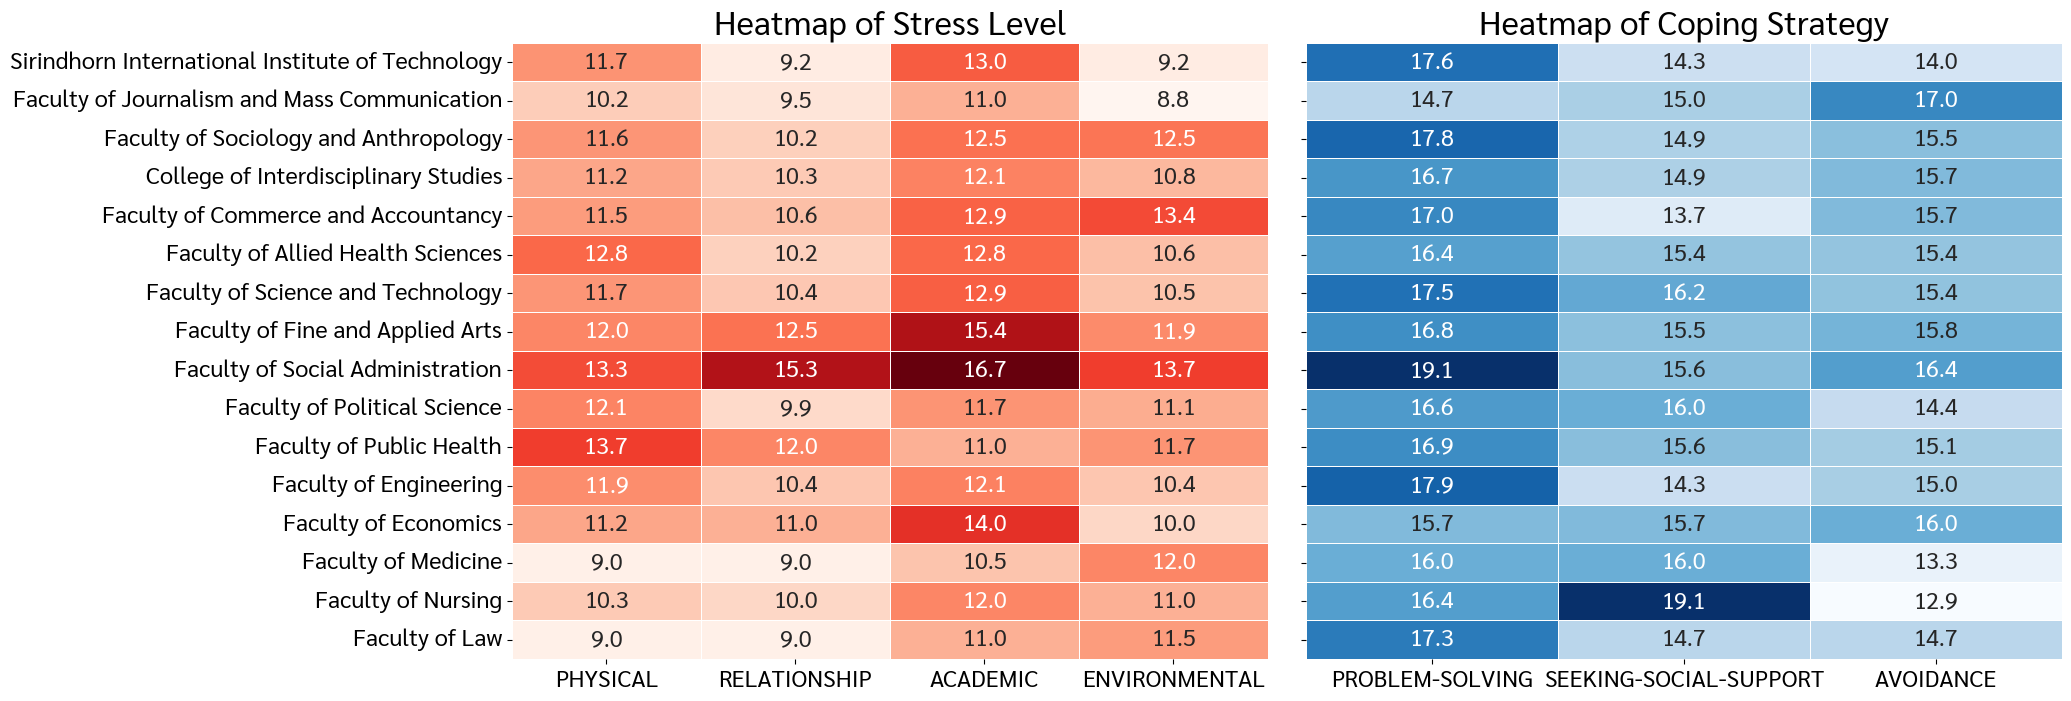

In [26]:
heatmap_SSI = EDA.pivot_table(index='Faculty', values=['PHYSICAL', 'RELATIONSHIP', 'ACADEMIC', 'ENVIRONMENTAL'], aggfunc='mean')
heatmap_CSI = EDA.pivot_table(index='Faculty', values=['PROBLEM-SOLVING', 'SEEKING-SOCIAL-SUPPORT', 'AVOIDANCE'], aggfunc='mean')

column_SSI = ['PHYSICAL', 'RELATIONSHIP', 'ACADEMIC', 'ENVIRONMENTAL']
column_CSI = ['PROBLEM-SOLVING', 'SEEKING-SOCIAL-SUPPORT', 'AVOIDANCE']

heatmap_SSI = heatmap_SSI[column_SSI]
heatmap_CSI = heatmap_CSI[column_CSI]

heatmap_SSI['Text_Length'] = heatmap_SSI.index.map(len)
heatmap_SSI = heatmap_SSI.sort_values(by='Text_Length', ascending=False).drop('Text_Length', axis=1)

heatmap_CSI['Text_Length'] = heatmap_CSI.index.map(len)
heatmap_CSI = heatmap_CSI.sort_values(by='Text_Length', ascending=False).drop('Text_Length', axis=1)

annot_kws = {"fontsize": 17}

# กำหนดขนาดของ subplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# สร้าง heatmap สำหรับ SSI
sns.heatmap(heatmap_SSI, cmap="Reds", annot=True, fmt=".1f", linewidths=.5, annot_kws=annot_kws, ax=axes[0], cbar_kws={'label': 'SSI Score'}, cbar=0)
axes[0].set(xlabel="", ylabel="")
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=17)
axes[0].set_yticklabels(axes[0].get_yticklabels(), fontsize=17)
axes[0].set_title('Heatmap of Stress Level', fontdict={'fontsize': 24})

# สร้าง heatmap สำหรับ CSI
sns.heatmap(heatmap_CSI, cmap="Blues", annot=True, fmt=".1f", linewidths=.5, annot_kws=annot_kws, ax=axes[1], cbar_kws={'label': 'CSI Score'}, cbar=0)
axes[1].set(xlabel="", ylabel="")
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=17)
axes[1].set_yticklabels([])
axes[1].set_title('Heatmap of Coping Strategy', fontdict={'fontsize': 24})

plt.subplots_adjust(wspace=0.05)

plt.show()

In [27]:
EDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Faculty                 150 non-null    object 
 1   Gender                  150 non-null    object 
 2   Year                    150 non-null    object 
 3   PHYSICAL                150 non-null    int64  
 4   RELATIONSHIP            150 non-null    int64  
 5   ACADEMIC                150 non-null    int64  
 6   ENVIRONMENTAL           150 non-null    int64  
 7   PROBLEM-SOLVING         150 non-null    float64
 8   SEEKING-SOCIAL-SUPPORT  150 non-null    float64
 9   AVOIDANCE               150 non-null    float64
dtypes: float64(3), int64(4), object(3)
memory usage: 11.8+ KB


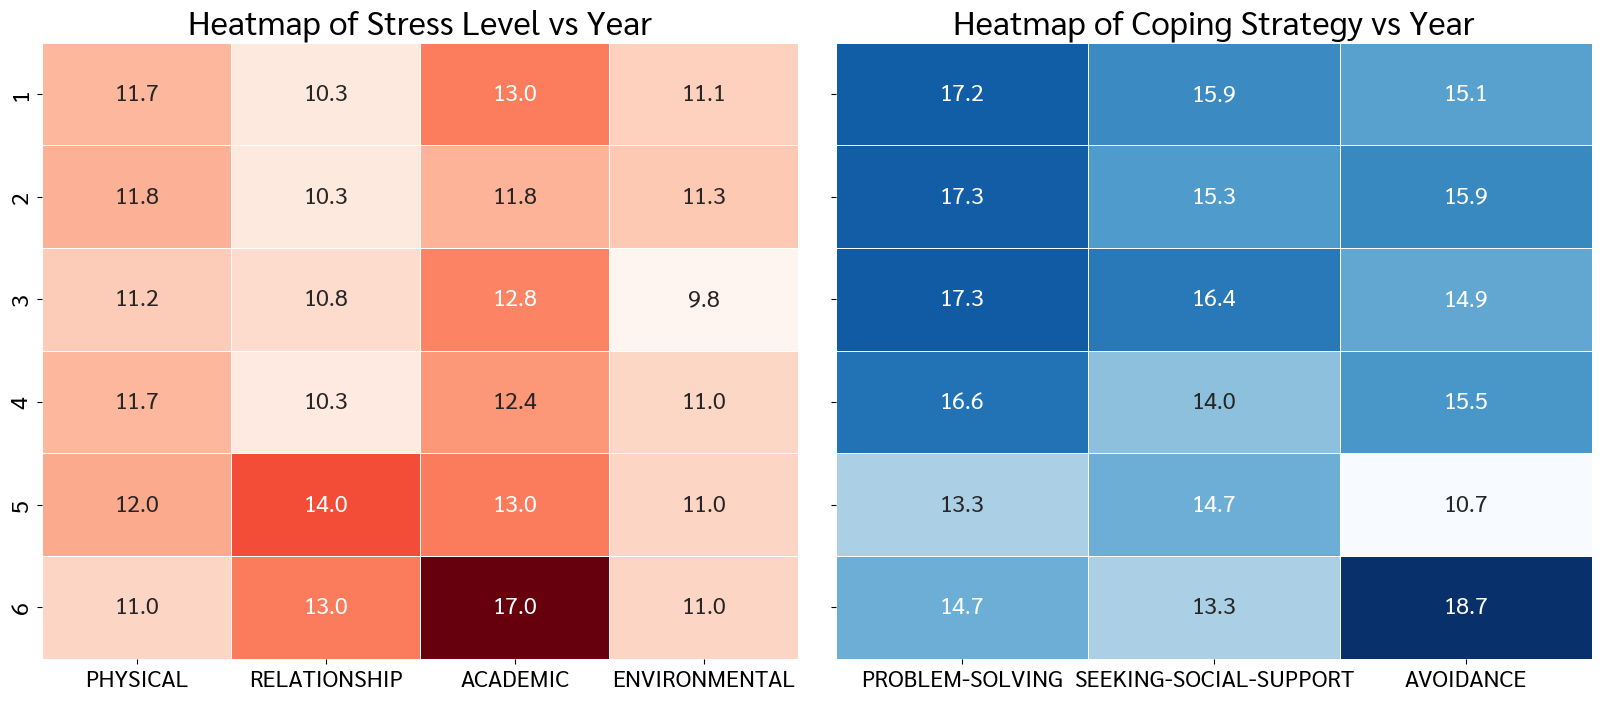

In [28]:
heatmap_SSI = EDA.pivot_table(index='Year', values=['PHYSICAL', 'RELATIONSHIP', 'ACADEMIC', 'ENVIRONMENTAL'], aggfunc='mean')
heatmap_CSI = EDA.pivot_table(index='Year', values=['PROBLEM-SOLVING', 'SEEKING-SOCIAL-SUPPORT', 'AVOIDANCE'], aggfunc='mean')

column_SSI = ['PHYSICAL', 'RELATIONSHIP', 'ACADEMIC', 'ENVIRONMENTAL']
column_CSI = ['PROBLEM-SOLVING', 'SEEKING-SOCIAL-SUPPORT', 'AVOIDANCE']

heatmap_SSI = heatmap_SSI[column_SSI]
heatmap_CSI = heatmap_CSI[column_CSI]

annot_kws = {"fontsize": 17}

# กำหนดขนาดของ subplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# สร้าง heatmap สำหรับ SSI
sns.heatmap(heatmap_SSI, cmap="Reds", annot=True, fmt=".1f", linewidths=.5, annot_kws=annot_kws, ax=axes[0], cbar_kws={'label': 'SSI Score'}, cbar=0)
axes[0].set(xlabel="", ylabel="")
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=17)
axes[0].set_yticklabels(axes[0].get_yticklabels(), fontsize=17)
axes[0].set_title('Heatmap of Stress Level vs Year', fontdict={'fontsize': 24})

# สร้าง heatmap สำหรับ CSI
sns.heatmap(heatmap_CSI, cmap="Blues", annot=True, fmt=".1f", linewidths=.5, annot_kws=annot_kws, ax=axes[1], cbar_kws={'label': 'CSI Score'}, cbar=0)
axes[1].set(xlabel="", ylabel="")
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=17)
axes[1].set_yticklabels([])
axes[1].set_title('Heatmap of Coping Strategy vs Year', fontdict={'fontsize': 24})

plt.subplots_adjust(wspace=0.05)

plt.show()

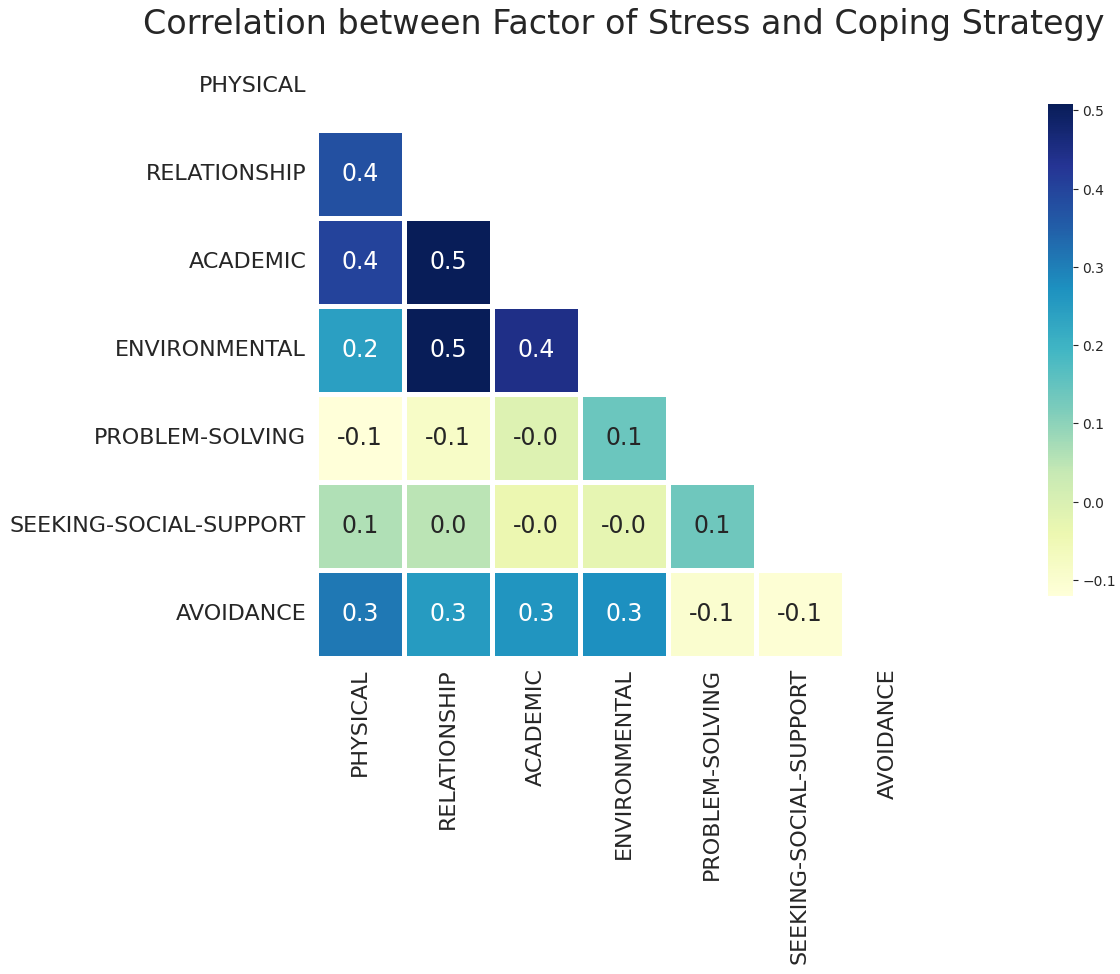

In [29]:
corr = EDA.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(30, 8))
    ax.set_title('Correlation between Factor of Stress and Coping Strategy', fontdict={'fontsize': 24})
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=2.5, fmt=".1f",annot=True,cmap="YlGnBu",  cbar_kws={"shrink": 0.8}, annot_kws={"size": 17})
    ax.tick_params(axis='both', labelsize=16)

## Principal Component Analysis

In [30]:
df.head()

,Faculty,Gender,Year,Q1,Q2,Q3,Q4,Q5,Q6,Q7,...,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35
0,Faculty of Law,Male,1,2,1,2,1,1,1,1,...,2,3,3,3,2,2,3,1,3,2
1,Faculty of Law,Male,4,2,3,2,1,3,1,2,...,2,2,2,2,1,2,3,2,2,2
2,Faculty of Nursing,Female,2,2,3,3,2,3,3,2,...,3,3,2,3,3,2,3,2,2,3
3,Faculty of Nursing,Female,3,1,2,1,1,2,1,1,...,3,3,3,3,3,1,2,1,2,2
4,Faculty of Nursing,Female,3,1,2,3,2,3,2,2,...,3,3,3,3,2,2,2,1,2,2


In [31]:
P1 = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']
P2 = ['Q6', 'Q7', 'Q8', 'Q9', 'Q10']
P3 = ['Q11', 'Q12', 'Q13', 'Q14', 'Q15']
P4 = ['Q16', 'Q17', 'Q18', 'Q19', 'Q20']
P5 = ['Q21', 'Q22', 'Q23', 'Q24', 'Q25']
P6 = ['Q26', 'Q27', 'Q28', 'Q29', 'Q30']
P7 = ['Q31', 'Q32', 'Q33', 'Q34', 'Q35']

# บวกข้อมูลในแต่ละคอลัมน์ที่เลือก
P1 = df[P1].sum(axis=1) #PHYSICAL
P2 = df[P2].sum(axis=1) #RELATIONSHIP
P3 = df[P3].sum(axis=1) #ACADEMIC
P4 = df[P4].sum(axis=1) #ENVIRONMENTAL
P5 = df[P5].sum(axis=1) #PROBLEM-SOLVING
P6 = df[P6].sum(axis=1) #SEEKING-SOCIAL-SUPPORT
P7 = df[P7].sum(axis=1) #AVOIDANCE

# สร้างคอลัมน์ใหม่ใน DataFrame จากผลรวม
df['PHYSICAL'] = P1
df['RELATIONSHIP'] = P2
df['ACADEMIC'] = P3
df['ENVIRONMENTAL'] = P4
df['PROBLEM-SOLVING'] = P5
df['SEEKING-SOCIAL-SUPPORT'] = P6
df['AVOIDANCE'] = P7

columns_to_drop = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35']

df = df.drop(columns=columns_to_drop)
df['PROBLEM-SOLVING'] = (df['PROBLEM-SOLVING'] / 15) * 20
df['SEEKING-SOCIAL-SUPPORT'] = (df['SEEKING-SOCIAL-SUPPORT'] / 15) * 20
df['AVOIDANCE'] = (df['AVOIDANCE'] / 15) * 20

In [32]:
df2 = df.copy()

In [33]:
df2.head()

,Faculty,Gender,Year,PHYSICAL,RELATIONSHIP,ACADEMIC,ENVIRONMENTAL,PROBLEM-SOLVING,SEEKING-SOCIAL-SUPPORT,AVOIDANCE
0,Faculty of Law,Male,1,7,10,10,15,18.666667,17.333333,14.666667
1,Faculty of Law,Male,4,11,8,12,8,16.000000,12.000000,14.666667
2,Faculty of Nursing,Female,2,13,14,12,13,16.000000,18.666667,16.000000
3,Faculty of Nursing,Female,3,7,6,12,9,18.666667,20.000000,10.666667
4,Faculty of Nursing,Female,3,11,10,12,11,14.666667,18.666667,12.000000


In [34]:
columns_to_normalize = ['PHYSICAL', 'RELATIONSHIP', 'ACADEMIC', 'ENVIRONMENTAL', 'PROBLEM-SOLVING', 'SEEKING-SOCIAL-SUPPORT', 'AVOIDANCE']
df2[columns_to_normalize] = df2[columns_to_normalize].apply(zscore)

In [35]:
df2.head()

,Faculty,Gender,Year,PHYSICAL,RELATIONSHIP,ACADEMIC,ENVIRONMENTAL,PROBLEM-SOLVING,SEEKING-SOCIAL-SUPPORT,AVOIDANCE
0,Faculty of Law,Male,1,-1.889064,-0.166387,-0.981341,1.303942,0.733017,0.679851,-0.231160
1,Faculty of Law,Male,4,-0.274479,-0.922690,-0.256212,-0.951641,-0.488678,-1.208623,-0.231160
2,Faculty of Nursing,Female,2,0.532813,1.346220,-0.256212,0.659490,-0.488678,1.151969,0.264183
3,Faculty of Nursing,Female,3,-1.889064,-1.678994,-0.256212,-0.629415,0.733017,1.624088,-1.717191
4,Faculty of Nursing,Female,3,-0.274479,-0.166387,-0.256212,0.015037,-1.099525,1.151969,-1.221848


In [36]:
df2 = pd.get_dummies(df2, columns=['Faculty', 'Gender', 'Year'])
df2.head()

,PHYSICAL,RELATIONSHIP,ACADEMIC,ENVIRONMENTAL,PROBLEM-SOLVING,SEEKING-SOCIAL-SUPPORT,AVOIDANCE,Faculty_College of Interdisciplinary Studies,Faculty_Faculty of Allied Health Sciences,Faculty_Faculty of Commerce and Accountancy,...,Gender_Female,Gender_LGBTQ+,Gender_Male,Gender_N/A,Year_1,Year_2,Year_3,Year_4,Year_5,Year_6
0,-1.889064,-0.166387,-0.981341,1.303942,0.733017,0.679851,-0.231160,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,-0.274479,-0.922690,-0.256212,-0.951641,-0.488678,-1.208623,-0.231160,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,0.532813,1.346220,-0.256212,0.659490,-0.488678,1.151969,0.264183,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,-1.889064,-1.678994,-0.256212,-0.629415,0.733017,1.624088,-1.717191,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,-0.274479,-0.166387,-0.256212,0.015037,-1.099525,1.151969,-1.221848,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [37]:
df2.columns

Index(['PHYSICAL', 'RELATIONSHIP', 'ACADEMIC', 'ENVIRONMENTAL',
       'PROBLEM-SOLVING', 'SEEKING-SOCIAL-SUPPORT', 'AVOIDANCE',
       'Faculty_College of Interdisciplinary Studies',
       'Faculty_Faculty of Allied Health Sciences',
       'Faculty_Faculty of Commerce and Accountancy',
       'Faculty_Faculty of Economics', 'Faculty_Faculty of Engineering',
       'Faculty_Faculty of Fine and Applied Arts',
       'Faculty_Faculty of Journalism and Mass Communication',
       'Faculty_Faculty of Law', 'Faculty_Faculty of Medicine',
       'Faculty_Faculty of Nursing', 'Faculty_Faculty of Political Science',
       'Faculty_Faculty of Public Health',
       'Faculty_Faculty of Science and Technology',
       'Faculty_Faculty of Social Administration',
       'Faculty_Faculty of Sociology and Anthropology',
       'Faculty_Sirindhorn International Institute of Technology',
       'Gender_Female', 'Gender_LGBTQ+', 'Gender_Male', 'Gender_N/A', 'Year_1',
       'Year_2', 'Year_3', 'Year_

In [38]:
X = df2
c = X.cov()
eigenvalues, eigenvectors = np.linalg.eig(c)
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)

In [39]:
n_components = np.argmax(explained_var >= 0.50) + 1
n_components

3

In [40]:
pca = PCA(n_components=3)
pca.fit(X)
x_pca = pca.transform(X)

df_pca = pd.DataFrame(x_pca,
                       columns=['PC{}'.
                       format(i+1)
                        for i in range(n_components)])
df_pca.head()

,PC1,PC2,PC3
0,-1.005502,1.551921,1.007510
1,-1.262955,-1.291854,0.740304
2,1.222738,0.304476,-1.136061
3,-2.654045,1.601311,-0.617111
4,-0.646299,0.076439,-1.429349


In [41]:
pca.explained_variance_ratio_

array([0.27389863, 0.13843716, 0.11310367])

In [42]:
pca.components_

array([[ 4.20404938e-01,  4.93353435e-01,  4.84939671e-01,
         4.47738818e-01, -6.11393101e-02, -1.58775859e-02,
         3.52551363e-01, -9.95658262e-03,  5.70884160e-03,
         1.06281963e-02,  3.50227968e-03, -5.17873092e-03,
         2.38975148e-02, -8.20632367e-03, -6.06196791e-03,
        -6.47735812e-03, -5.55195768e-03, -1.05451998e-02,
         3.86723518e-03, -2.67167863e-03,  1.92827891e-02,
         4.95206884e-03, -1.71891262e-02,  8.08440594e-02,
        -1.83331625e-03, -8.56584763e-02,  6.64773315e-03,
         7.14515024e-03, -9.75196141e-04, -9.27044970e-03,
        -2.37168566e-03,  8.79668703e-04,  4.59251256e-03],
       [-1.00378600e-01,  9.31910544e-02,  8.89626284e-02,
         2.51440311e-01,  6.98577020e-01,  5.40973225e-01,
        -2.62908081e-01, -4.58857034e-02, -2.88927647e-02,
        -6.69188640e-03, -1.09478650e-02,  3.24516694e-03,
         8.35014194e-03, -2.70196335e-02,  1.37500799e-03,
         1.07979448e-04,  1.04802893e-02,  4.36231838e-

In [43]:
df_pca_comp= pd.DataFrame(data= pca.components_, columns= X.columns.values, index=['Component 1', 'Component 2', 'Component 3'])

In [44]:
df_pca_comp

,PHYSICAL,RELATIONSHIP,ACADEMIC,ENVIRONMENTAL,PROBLEM-SOLVING,SEEKING-SOCIAL-SUPPORT,AVOIDANCE,Faculty_College of Interdisciplinary Studies,Faculty_Faculty of Allied Health Sciences,Faculty_Faculty of Commerce and Accountancy,...,Gender_Female,Gender_LGBTQ+,Gender_Male,Gender_N/A,Year_1,Year_2,Year_3,Year_4,Year_5,Year_6
Component 1,0.420405,0.493353,0.484940,0.447739,-0.061139,-0.015878,0.352551,-0.009957,0.005709,0.010628,...,0.080844,-0.001833,-0.085658,0.006648,0.007145,-0.000975,-0.009270,-0.002372,0.000880,0.004593
Component 2,-0.100379,0.093191,0.088963,0.251440,0.698577,0.540973,-0.262908,-0.045886,-0.028893,-0.006692,...,-0.096655,0.015601,0.107040,-0.025986,0.116357,-0.008550,0.021416,-0.117170,-0.004760,-0.007293
Component 3,-0.371977,-0.040911,0.066283,0.331017,0.406945,-0.714766,0.091243,0.030980,-0.030317,0.034758,...,-0.120845,-0.020490,0.148211,-0.006876,-0.059128,0.015709,-0.042259,0.089233,-0.005324,0.001767


## Find the Best Value of K

In [45]:
df_pca.head()

,PC1,PC2,PC3
0,-1.005502,1.551921,1.007510
1,-1.262955,-1.291854,0.740304
2,1.222738,0.304476,-1.136061
3,-2.654045,1.601311,-0.617111
4,-0.646299,0.076439,-1.429349


### Choose K by Elbow method

In [46]:
wcss_pca=[]
for i in range(1,11):
    kmeans_pca=KMeans(n_clusters= i, init='k-means++', random_state=200)
    kmeans_pca.fit(df_pca)
    wcss_pca.append(kmeans_pca.inertia_)

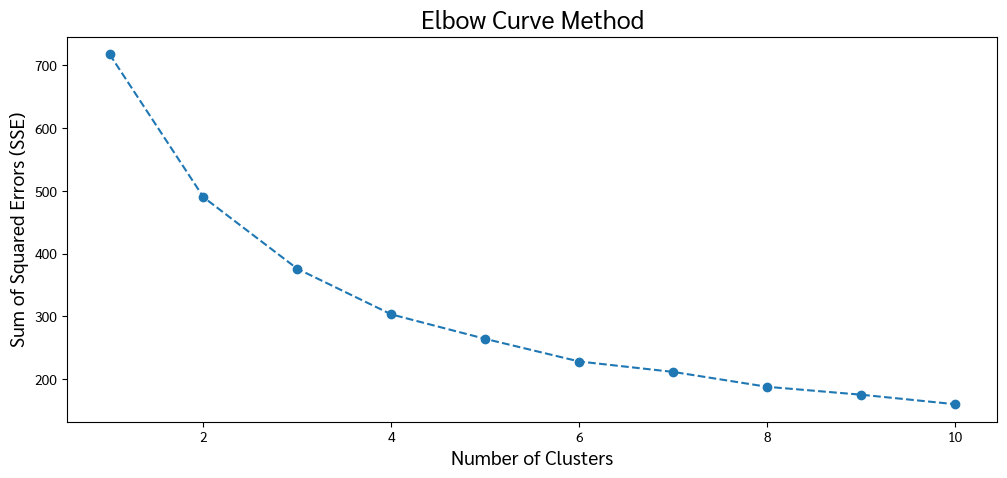

In [47]:
plt.figure(figsize=(12,5))
plt.plot(range(1,11),wcss_pca, marker='o', linestyle='--', color='tab:blue')
plt.xlabel("Number of Clusters", fontsize=14)
plt.ylabel("Sum of Squared Errors (SSE)", fontsize=14)
plt.title("Elbow Curve Method", fontsize=18)
plt.show()

In [48]:
# from yellowbrick.cluster import KElbowVisualizer
# Elbow_M = KElbowVisualizer(KMeans(), k=10)
# Elbow_M.fit(x_pca)
# Elbow_M.show()

### Choose K by Silhouette Score

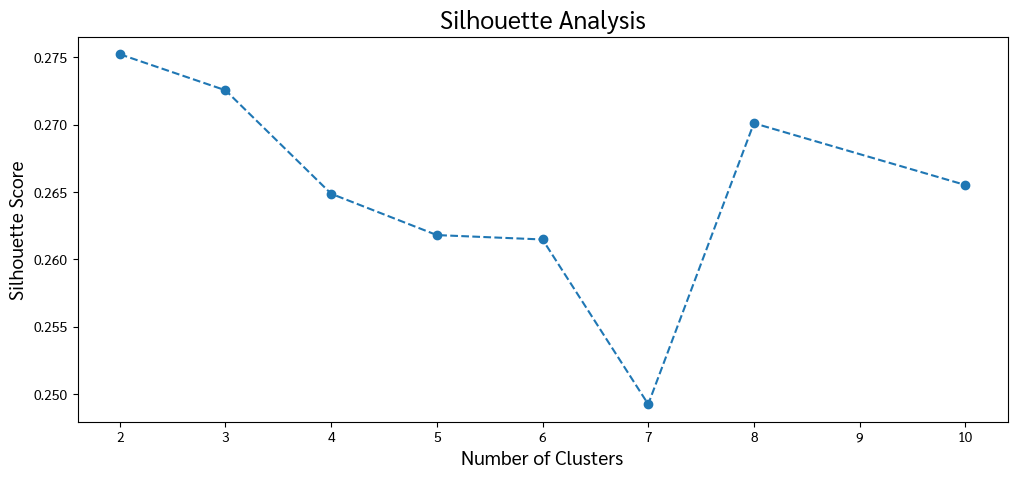

In [49]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 10]
silhouette_avg = []

for num_clusters in range_n_clusters:
    # initialize kmeans
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=200)
    kmeans.fit(x_pca) #x_pca
    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg.append(silhouette_score(x_pca, cluster_labels))

# plot silhouette scores
plt.figure(figsize=(12,5))
plt.plot(range_n_clusters, silhouette_avg, 'bx-', marker='o', linestyle='--', color='tab:blue')
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)
plt.title('Silhouette Analysis', fontsize=18)
plt.show()


### Compare Method

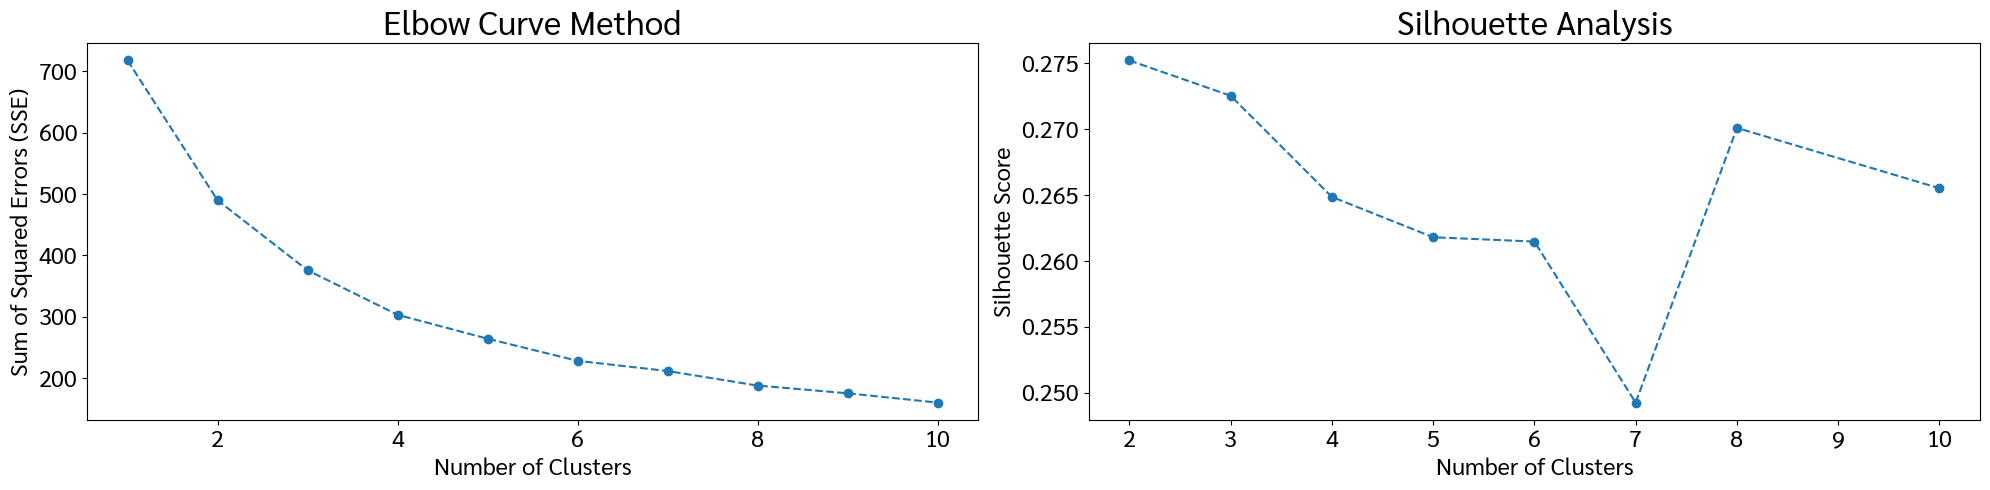

In [50]:
plt.figure(figsize=(20, 5), facecolor='white')

# Plot Elbow Curve
plt.subplot(1, 2, 1, facecolor='white') 
plt.plot(range(1, 11), wcss_pca, marker='o', linestyle='--')
plt.xlabel("Number of Clusters", fontsize=17)
plt.ylabel("Sum of Squared Errors (SSE)", fontsize=17)
plt.title("Elbow Curve Method", fontsize=24)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

# Plot Silhouette Score
plt.subplot(1, 2, 2, facecolor='white')  # เพิ่ม facecolor เพื่อกำหนดสีพื้นหลัง
plt.plot(range_n_clusters, silhouette_avg, 'bx-', marker='o', linestyle='--', color='tab:blue')
plt.xlabel('Number of Clusters', fontsize=17)
plt.ylabel('Silhouette Score', fontsize=17)
plt.title('Silhouette Analysis', fontsize=24)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

plt.tight_layout()
plt.show()


In [51]:
kmeans_pca=KMeans(n_clusters= 3, init='k-means++', random_state=200)
kmeans_pca.fit(x_pca)

KMeans(n_clusters=3, random_state=200)

In [52]:
df_pca['Cluster']= kmeans_pca.labels_
df_pca['Cluster']= df_pca['Cluster'].map({0:'The Life Balancers',1:'The Chill Crew',2:'The Always Fighters'})

In [53]:
df_pca.head()

,PC1,PC2,PC3,Cluster
0,-1.005502,1.551921,1.007510,The Life Balancers
1,-1.262955,-1.291854,0.740304,The Always Fighters
2,1.222738,0.304476,-1.136061,The Chill Crew
3,-2.654045,1.601311,-0.617111,The Life Balancers
4,-0.646299,0.076439,-1.429349,The Life Balancers


In [54]:
merged_df = pd.concat([df, df_pca['Cluster']], axis=1)

In [55]:
merged_df.head()

,Faculty,Gender,Year,PHYSICAL,RELATIONSHIP,ACADEMIC,ENVIRONMENTAL,PROBLEM-SOLVING,SEEKING-SOCIAL-SUPPORT,AVOIDANCE,Cluster
0,Faculty of Law,Male,1,7,10,10,15,18.666667,17.333333,14.666667,The Life Balancers
1,Faculty of Law,Male,4,11,8,12,8,16.000000,12.000000,14.666667,The Always Fighters
2,Faculty of Nursing,Female,2,13,14,12,13,16.000000,18.666667,16.000000,The Chill Crew
3,Faculty of Nursing,Female,3,7,6,12,9,18.666667,20.000000,10.666667,The Life Balancers
4,Faculty of Nursing,Female,3,11,10,12,11,14.666667,18.666667,12.000000,The Life Balancers


In [153]:
merged_df.to_csv('ClusterAnalysisK3.csv', index=False)

## Analysis each Cluster

In [56]:
merged_df.head()

,Faculty,Gender,Year,PHYSICAL,RELATIONSHIP,ACADEMIC,ENVIRONMENTAL,PROBLEM-SOLVING,SEEKING-SOCIAL-SUPPORT,AVOIDANCE,Cluster
0,Faculty of Law,Male,1,7,10,10,15,18.666667,17.333333,14.666667,The Life Balancers
1,Faculty of Law,Male,4,11,8,12,8,16.000000,12.000000,14.666667,The Always Fighters
2,Faculty of Nursing,Female,2,13,14,12,13,16.000000,18.666667,16.000000,The Chill Crew
3,Faculty of Nursing,Female,3,7,6,12,9,18.666667,20.000000,10.666667,The Life Balancers
4,Faculty of Nursing,Female,3,11,10,12,11,14.666667,18.666667,12.000000,The Life Balancers


In [57]:
fig = px.scatter_matrix(
    x_pca,
    labels={'0': 'PC1', '1': 'PC2', '2': 'PC3'},
    dimensions=range(3),
    color=merged_df["Cluster"],
    size_max=10,  # ปรับขนาดสูงสุดของจุด
    height=800   # ปรับความสูงของ Scatter Matrix
)
fig.update_traces(diagonal_visible=False)
fig.update_layout(
    title='PCA Dimention',
    font=dict(size=18),
    title_x=0.5,  # Set the x-coordinate of the title to be in the middle
    title_y=0.97,   # Set the font size for the title
)

fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
fig = px.scatter_3d(
    x_pca, x=0, y=1, z=2, color=merged_df["Cluster"],
    title=f'',
    labels={'0': 'PC1', '1': 'PC2', '2': 'PC3'},
    size_max=10,  # ปรับขนาดสูงสุดของจุด
    height=500,
)
fig.update_layout(
    title='PCA Plot',
    font=dict(size=18),
    title_x=0.5,  # Set the x-coordinate of the title to be in the middle
    title_y=0.88,
    scene=dict(
        xaxis=dict(tickfont=dict(size=12)),  # Adjust the font size of the x-axis labels
        yaxis=dict(tickfont=dict(size=12)),  # Adjust the font size of the y-axis labels
        zaxis=dict(tickfont=dict(size=12)),  # Adjust the font size of the z-axis labels
    )   # Set the font size for the title
)
fig.show()

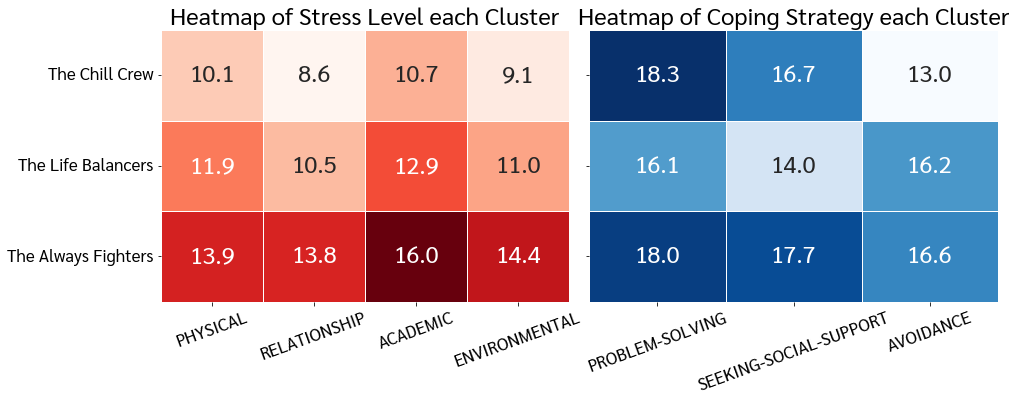

In [ ]:
# สร้าง Categorical data type ที่กำหนดลำดับ
cluster_order = ['The Chill Crew', 'The Life Balancers', 'The Always Fighters']
merged_df['Cluster'] = pd.Categorical(merged_df['Cluster'], categories=cluster_order, ordered=True)

heatmap_SSI = merged_df.pivot_table(index='Cluster', values=['PHYSICAL', 'RELATIONSHIP', 'ACADEMIC', 'ENVIRONMENTAL'], aggfunc='mean')
heatmap_CSI = merged_df.pivot_table(index='Cluster', values=['PROBLEM-SOLVING', 'SEEKING-SOCIAL-SUPPORT', 'AVOIDANCE'], aggfunc='mean')

column_SSI = ['PHYSICAL', 'RELATIONSHIP', 'ACADEMIC', 'ENVIRONMENTAL']
column_CSI = ['PROBLEM-SOLVING', 'SEEKING-SOCIAL-SUPPORT', 'AVOIDANCE']

heatmap_SSI = heatmap_SSI[column_SSI]
heatmap_CSI = heatmap_CSI[column_CSI]

annot_kws = {"fontsize": 24}

# กำหนดขนาดของ subplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

# สร้าง heatmap สำหรับ SSI
sns.heatmap(heatmap_SSI, cmap="Reds", annot=True, fmt=".1f", linewidths=.5, annot_kws=annot_kws, ax=axes[0], cbar_kws={'label': 'SSI Score'}, cbar=0)
axes[0].set(xlabel="", ylabel="")
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=17, rotation=20) #rotationหมุนเเกน
axes[0].set_yticklabels(merged_df['Cluster'].unique(), fontsize=17, rotation=0)  # เรียงลำดับตาม cluster_order
axes[0].set_title('Heatmap of Stress Level each Cluster', fontdict={'fontsize': 24})

# สร้าง heatmap สำหรับ CSI
sns.heatmap(heatmap_CSI, cmap="Blues", annot=True, fmt=".1f", linewidths=.5, annot_kws=annot_kws, ax=axes[1], cbar_kws={'label': 'CSI Score'}, cbar=0)
axes[1].set(xlabel="", ylabel="")
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=17,rotation=20)
axes[1].set_yticklabels([])  # ไม่ต้องเรียงลำดับเเกน y
axes[1].set_title('Heatmap of Coping Strategy each Cluster', fontdict={'fontsize': 24})


plt.subplots_adjust(wspace=0.05)

plt.show()


## Save Cluster into Pickle

In [58]:
save_path = '/Users/phattharakit_/Desktop/application/Stress_Clustering.pkl'

In [3]:
pickle.dump(merged_df, open(save_path, 'wb'))

NameError: name 'merged_df' is not defined

In [59]:
X = pickle.load(open(save_path, 'rb'))

In [60]:
X

,Faculty,Gender,Year,PHYSICAL,RELATIONSHIP,ACADEMIC,ENVIRONMENTAL,PROBLEM-SOLVING,SEEKING-SOCIAL-SUPPORT,AVOIDANCE,Cluster
0,Faculty of Law,Male,1,7,10,10,15,18.666667,17.333333,14.666667,The Chill Crew
1,Faculty of Law,Male,4,11,8,12,8,16.000000,12.000000,14.666667,The Life Balancers
2,Faculty of Nursing,Female,2,13,14,12,13,16.000000,18.666667,16.000000,The Always Fighters
3,Faculty of Nursing,Female,3,7,6,12,9,18.666667,20.000000,10.666667,The Chill Crew
4,Faculty of Nursing,Female,3,11,10,12,11,14.666667,18.666667,12.000000,The Chill Crew
...,...,...,...,...,...,...,...,...,...,...,...
145,Faculty of Social Administration,Female,1,15,13,16,12,17.333333,14.666667,20.000000,The Always Fighters
146,Faculty of Social Administration,Female,3,12,18,17,14,20.000000,16.000000,13.333333,The Always Fighters
147,Faculty of Public Health,Female,4,13,15,10,10,13.333333,13.333333,13.333333,The Life Balancers
148,Faculty of Public Health,Female,2,13,9,11,13,20.000000,18.666667,16.000000,The Chill Crew


In [61]:
column_order = ['Faculty', 'Gender', 'Year', 'PHYSICAL', 'RELATIONSHIP', 'ACADEMIC', 'ENVIRONMENTAL', 'PROBLEM-SOLVING', 'SEEKING-SOCIAL-SUPPORT', 'AVOIDANCE']
X = X.reindex(columns=column_order)
X.head()

,Faculty,Gender,Year,PHYSICAL,RELATIONSHIP,ACADEMIC,ENVIRONMENTAL,PROBLEM-SOLVING,SEEKING-SOCIAL-SUPPORT,AVOIDANCE
0,Faculty of Law,Male,1,7,10,10,15,18.666667,17.333333,14.666667
1,Faculty of Law,Male,4,11,8,12,8,16.000000,12.000000,14.666667
2,Faculty of Nursing,Female,2,13,14,12,13,16.000000,18.666667,16.000000
3,Faculty of Nursing,Female,3,7,6,12,9,18.666667,20.000000,10.666667
4,Faculty of Nursing,Female,3,11,10,12,11,14.666667,18.666667,12.000000


In [62]:
PHYSICAL_MEAN = X['PHYSICAL'].mean()
PHYSICAL_STD = X['PHYSICAL'].std()

RELATIONSHIP_MEAN = X['RELATIONSHIP'].mean()
RELATIONSHIP_STD = X['RELATIONSHIP'].std()

ACADEMIC_MEAN = X['ACADEMIC'].mean()
ACADEMIC_STD = X['ACADEMIC'].std()

ENVIRONMENTAL_MEAN = X['ENVIRONMENTAL'].mean()
ENVIRONMENTAL_STD = X['ENVIRONMENTAL'].std()

PROBLEM_SOLVING_MEAN = X['PROBLEM-SOLVING'].mean()
PPROBLEM_SOLVING_STD = X['PROBLEM-SOLVING'].std()

SEEKING_SOCIAL_SUPPOR_MEAN = X['SEEKING-SOCIAL-SUPPORT'].mean()
SEEKING_SOCIAL_SUPPOR_STD = X['SEEKING-SOCIAL-SUPPORT'].std()

AVOIDANCE_MEAN = X['AVOIDANCE'].mean()
AVOIDANCE_STD = X['AVOIDANCE'].std()

In [63]:
print(PHYSICAL_MEAN)
print(RELATIONSHIP_MEAN)
print(ACADEMIC_MEAN)
print(ENVIRONMENTAL_MEAN)
print(PROBLEM_SOLVING_MEAN)
print(SEEKING_SOCIAL_SUPPOR_MEAN)
print(AVOIDANCE_MEAN)


11.68
10.44
12.706666666666667
10.953333333333333
17.066666666666666
15.413333333333334
15.28888888888889


In [80]:
columns_to_normalize = ['PHYSICAL', 'RELATIONSHIP', 'ACADEMIC', 'ENVIRONMENTAL', 'PROBLEM-SOLVING', 'SEEKING-SOCIAL-SUPPORT', 'AVOIDANCE']
X[columns_to_normalize] = X[columns_to_normalize].apply(zscore)
X = pd.get_dummies(X, columns=['Faculty', 'Gender', 'Year'])

In [81]:
X.head()

,PHYSICAL,RELATIONSHIP,ACADEMIC,ENVIRONMENTAL,PROBLEM-SOLVING,SEEKING-SOCIAL-SUPPORT,AVOIDANCE,Faculty_College of Interdisciplinary Studies,Faculty_Faculty of Allied Health Sciences,Faculty_Faculty of Commerce and Accountancy,...,Gender_Female,Gender_LGBTQ+,Gender_Male,Gender_N/A,Year_1,Year_2,Year_3,Year_4,Year_5,Year_6
0,-1.889064,-0.166387,-0.981341,1.303942,0.733017,0.679851,-0.231160,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,-0.274479,-0.922690,-0.256212,-0.951641,-0.488678,-1.208623,-0.231160,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,0.532813,1.346220,-0.256212,0.659490,-0.488678,1.151969,0.264183,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,-1.889064,-1.678994,-0.256212,-0.629415,0.733017,1.624088,-1.717191,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,-0.274479,-0.166387,-0.256212,0.015037,-1.099525,1.151969,-1.221848,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [82]:
Faculty = ['Faculty of Law']
Gender = ['Male']
Year = ['1']
Q1 = int('3')
Q2 = int('2')
Q3 = int('1')
Q4 = int('4')
Q5 = int('3')
Q6 = int('2')
Q7 = int('3')
Q8 = int('3')
Q9 = int('2')
Q10 = int('4')
Q11 = int('2')
Q12 = int('3')
Q13 = int('1')
Q14 = int('2')
Q15 = int('3')
Q16 = int('4')
Q17 = int('4')
Q18 = int('2')
Q19 = int('3')
Q20 = int('4')
Q21 = int('2')
Q22 = int('2')
Q23 = int('3')
Q24 = int('2')
Q25 = int('2')
Q26 = int('2')
Q27 = int('3')
Q28 = int('3')
Q29 = int('3')
Q30 = int('2')
Q31 = int('2')
Q32 = int('2')
Q33 = int('3')
Q34 = int('1')
Q35 = int('1')

data = {
    'Faculty': Faculty,
    'Gender': Gender,
    'Year': Year,
    'Q1': [Q1],
    'Q2': [Q2],
    'Q3': [Q3],
    'Q4': [Q4],
    'Q5': [Q5],
    'Q6': [Q6],
    'Q7': [Q7],
    'Q8': [Q8],
    'Q9': [Q9],
    'Q10': [Q10],
    'Q11': [Q11],
    'Q12': [Q12],
    'Q13': [Q13],
    'Q14': [Q14],
    'Q15': [Q15],
    'Q16': [Q16],
    'Q17': [Q17],
    'Q18': [Q18],
    'Q19': [Q19],
    'Q20': [Q20],
    'Q21': [Q21],
    'Q22': [Q22],
    'Q23': [Q23],
    'Q24': [Q24],
    'Q25': [Q25],
    'Q26': [Q26],
    'Q27': [Q27],
    'Q28': [Q28],
    'Q29': [Q29],
    'Q30': [Q30],
    'Q31': [Q31],
    'Q32': [Q32],
    'Q33': [Q33],
    'Q34': [Q34],
    'Q35': [Q35],
}

df = pd.DataFrame(data)

In [83]:
df.head()

,Faculty,Gender,Year,Q1,Q2,Q3,Q4,Q5,Q6,Q7,...,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35
0,Faculty of Law,Male,1,3,2,1,4,3,2,3,...,2,3,3,3,2,2,2,3,1,1


In [84]:
P1 = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']
P2 = ['Q6', 'Q7', 'Q8', 'Q9', 'Q10']
P3 = ['Q11', 'Q12', 'Q13', 'Q14', 'Q15']
P4 = ['Q16', 'Q17', 'Q18', 'Q19', 'Q20']
P5 = ['Q21', 'Q22', 'Q23', 'Q24', 'Q25']
P6 = ['Q26', 'Q27', 'Q28', 'Q29', 'Q30']
P7 = ['Q31', 'Q32', 'Q33', 'Q34', 'Q35']

# บวกข้อมูลในแต่ละคอลัมน์ที่เลือก
P1 = df[P1].sum(axis=1) #PHYSICAL
P2 = df[P2].sum(axis=1) #RELATIONSHIP
P3 = df[P3].sum(axis=1) #ACADEMIC
P4 = df[P4].sum(axis=1) #ENVIRONMENTAL
P5 = df[P5].sum(axis=1) #PROBLEM-SOLVING
P6 = df[P6].sum(axis=1) #SEEKING-SOCIAL-SUPPORT
P7 = df[P7].sum(axis=1) #AVOIDANCE

# สร้างคอลัมน์ใหม่ใน DataFrame จากผลรวม
df['PHYSICAL'] = P1
df['RELATIONSHIP'] = P2
df['ACADEMIC'] = P3
df['ENVIRONMENTAL'] = P4
df['PROBLEM-SOLVING'] = P5
df['SEEKING-SOCIAL-SUPPORT'] = P6
df['AVOIDANCE'] = P7

columns_to_drop = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35']

df = df.drop(columns=columns_to_drop)
df['PROBLEM-SOLVING'] = (df['PROBLEM-SOLVING'] / 15) * 20
df['SEEKING-SOCIAL-SUPPORT'] = (df['SEEKING-SOCIAL-SUPPORT'] / 15) * 20
df['AVOIDANCE'] = (df['AVOIDANCE'] / 15) * 20

In [85]:
df_ready = pd.get_dummies(df, columns=['Faculty', 'Gender', 'Year'])

In [86]:
df_ready['PHYSICAL'] = (df_ready['PHYSICAL'] - PHYSICAL_MEAN) / PHYSICAL_STD
df_ready['RELATIONSHIP'] = (df_ready['RELATIONSHIP'] - RELATIONSHIP_MEAN) / RELATIONSHIP_STD
df_ready['ACADEMIC'] = (df_ready['ACADEMIC'] - ACADEMIC_MEAN) / ACADEMIC_STD
df_ready['ENVIRONMENTAL'] = (df_ready['ENVIRONMENTAL'] - ENVIRONMENTAL_MEAN) / ENVIRONMENTAL_STD
df_ready['PROBLEM-SOLVING'] = (df_ready['PROBLEM-SOLVING'] - PROBLEM_SOLVING_MEAN) / PPROBLEM_SOLVING_STD
df_ready['SEEKING-SOCIAL-SUPPORT'] = (df_ready['SEEKING-SOCIAL-SUPPORT'] - SEEKING_SOCIAL_SUPPOR_MEAN) / SEEKING_SOCIAL_SUPPOR_STD
df_ready['AVOIDANCE'] = (df_ready['AVOIDANCE'] - AVOIDANCE_MEAN) / AVOIDANCE_STD

In [87]:
df_ready = df_ready.reindex(columns=X.columns)
df_ready = df_ready.fillna("0")
df_ready.head()

,PHYSICAL,RELATIONSHIP,ACADEMIC,ENVIRONMENTAL,PROBLEM-SOLVING,SEEKING-SOCIAL-SUPPORT,AVOIDANCE,Faculty_College of Interdisciplinary Studies,Faculty_Faculty of Allied Health Sciences,Faculty_Faculty of Commerce and Accountancy,...,Gender_Female,Gender_LGBTQ+,Gender_Male,Gender_N/A,Year_1,Year_2,Year_3,Year_4,Year_5,Year_6
0,0.531034,1.341725,-0.61671,1.941889,-1.095854,0.677581,-1.217768,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [159]:
pca = PCA(n_components=3)
x_pca = pca.fit_transform(X)

kmeans_pca = KMeans(n_clusters=3, init='k-means++', random_state=200)
kmeans_pca.fit(x_pca)

KMeans(n_clusters=3, random_state=200)

In [73]:
X['Cluster']= kmeans_pca.labels_
X['Cluster']= X['Cluster'].map({0:'1',1:'2',2:'3'})

In [161]:
X.head()

,PHYSICAL,RELATIONSHIP,ACADEMIC,ENVIRONMENTAL,PROBLEM-SOLVING,SEEKING-SOCIAL-SUPPORT,AVOIDANCE,Faculty_College of Interdisciplinary Studies,Faculty_Faculty of Allied Health Sciences,Faculty_Faculty of Commerce and Accountancy,...,Gender_LGBTQ+,Gender_Male,Gender_N/A,Year_1,Year_2,Year_3,Year_4,Year_5,Year_6,Cluster
0,-1.889064,-0.166387,-0.981341,1.303942,0.733017,0.679851,-0.231160,0,0,0,...,0,1,0,1,0,0,0,0,0,2
1,-0.274479,-0.922690,-0.256212,-0.951641,-0.488678,-1.208623,-0.231160,0,0,0,...,0,1,0,0,0,0,1,0,0,1
2,0.532813,1.346220,-0.256212,0.659490,-0.488678,1.151969,0.264183,0,0,0,...,0,0,0,0,1,0,0,0,0,3
3,-1.889064,-1.678994,-0.256212,-0.629415,0.733017,1.624088,-1.717191,0,0,0,...,0,0,0,0,0,1,0,0,0,2
4,-0.274479,-0.166387,-0.256212,0.015037,-1.099525,1.151969,-1.221848,0,0,0,...,0,0,0,0,0,1,0,0,0,2


In [162]:
df_cluster = pca.transform(df_ready)
df_cluster = kmeans_pca.predict(df_cluster)
df['Cluster'] = df_cluster
df['Cluster'] = df['Cluster'].map({0: '1', 1: '2', 2: '3'})

In [163]:
print(df)

          Faculty Gender Year  PHYSICAL  RELATIONSHIP  ACADEMIC  \
0  Faculty of Law   Male    1        13            14        11   

   ENVIRONMENTAL  PROBLEM-SOLVING  SEEKING-SOCIAL-SUPPORT  AVOIDANCE Cluster  
0             17        14.666667               17.333333       12.0       3  


In [164]:
try:
    with open(save_path, 'rb') as file:
        existing_data = pickle.load(file)
except FileNotFoundError:
    existing_data = pd.DataFrame()
updated_data = pd.concat([existing_data, df], ignore_index=True) # Add new data to DataFrame 
with open(save_path, 'wb') as file: # Save DataFrame into Pickle
    pickle.dump(updated_data, file)

In [88]:
X = pickle.load(open(save_path, 'rb'))
print(X)

                              Faculty  Gender Year  PHYSICAL  RELATIONSHIP  \
0                      Faculty of Law    Male    1         7            10   
1                      Faculty of Law    Male    4        11             8   
2                  Faculty of Nursing  Female    2        13            14   
3                  Faculty of Nursing  Female    3         7             6   
4                  Faculty of Nursing  Female    3        11            10   
..                                ...     ...  ...       ...           ...   
145  Faculty of Social Administration  Female    1        15            13   
146  Faculty of Social Administration  Female    3        12            18   
147          Faculty of Public Health  Female    4        13            15   
148          Faculty of Public Health  Female    2        13             9   
149          Faculty of Public Health  Female    1        15            12   

     ACADEMIC  ENVIRONMENTAL  PROBLEM-SOLVING  SEEKING-SOCIAL-S